# Solving Chemical Engineering problems with Python 
-----

The following document contains solutions to problems adapted from chemical engineering textbooks. Said solutions are posted with educational purposes only.

## Heat transfer in a slab
Adapted from Introduction to Chemical Engineering Computing by Bruce A. Finlayson  

$$\frac{d}{dx} \left[ \left(1+T^2\right) \frac{dT}{dx} \right] = 0$$  
Boundary Conditions
$$T_{x=0} = 0 \qquad T_{x=1} = 1$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
p = 20
x = np.linspace(0, 1, p)
dx = np.diff(x)[0]

T = np.zeros(p)
T[-1] = 1

ee = 5
a = 1

while ee>0.01:

    V = a*np.ones(p)

    for i in range(1, p):
        T[i] = dx*V[i-1] + T[i-1]
        e_num = 5
        while e_num > 0.00001:
            vt = (-(1+T[i]**2)/dx + np.sqrt( ((1+T[i]**2)/dx)**2 + 8*T[i]*((1+T[i]**2)/dx)*V[i-1] ))/(4*T[i])
            Tt = dx*V[i] + T[i-1]

            e_num = np.mean([abs(V[i]-vt), abs(T[i]-Tt)])
            V[i] = vt
            T[i] = Tt

        T[-1] = 1
    ee = abs(np.mean(np.diff(T)/dx - V[:-1]))
    a += ee

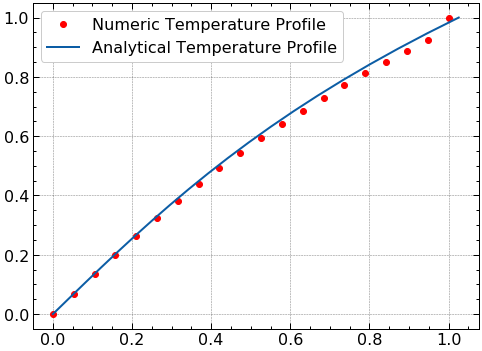

In [4]:
plt.plot(x, T, 'o', color = 'red', label = 'Numeric Temperature Profile')

T_teo = np.linspace(0, 1, 20)
x_aux = 1/1.3 * (T_teo**3/3 + T_teo)
plt.plot(x_aux, T_teo, label = 'Analytical Temperature Profile')
plt.legend()

## Chemical reaction
Excercise 9.31



Finite Differences method:
+ Explicit formulation
+ Forward Difference in Time
+ Second order midpoint approximation for second derivative

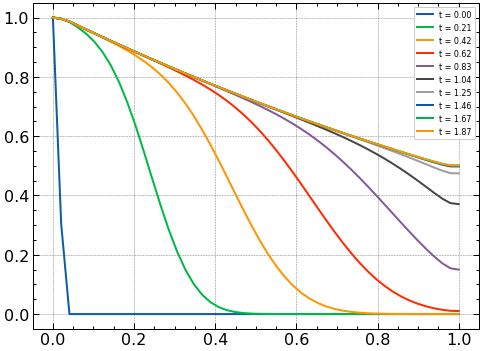

In [5]:
Pe = 100
Da = 2
v = 2
nx = 50

x = np.linspace(0, 1, nx)
dx = np.diff(x)[0]
dt = .1 * Pe * dx**2
nt = 500

c = np.zeros(nx)
c[0] = 1

for t in range(nt):
    cn = c.copy()
    
    for i in range(1, nx-1):

        c[i] = cn[i] + dt*((cn[i+1]-2*cn[i]+cn[i-1])/(Pe*dx**2) - Da*cn[i]/(cn[i]+v) - (cn[i] - cn[i-1])/dx)
    
    if t%(nt/10) ==0:
        plt.plot(x,c, label = 't = {:.2f}'.format(t*dt))
            
    c[nx-1] = c[nx-2]
    c[1] = c[0] + dx*(Pe*c[0] - Pe)
        
    
plt.legend(fontsize = 8)
